### Author: Truman Daniels

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
#data source: https://www.uscis.gov/tools/reports-and-studies/h-1b-employer-data-hub/h-1b-employer-data-hub-files
df_2023 = pd.read_csv("https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2023.csv")
df_2022 = pd.read_csv("https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2022.csv")
df_2021 = pd.read_csv("https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2021.csv")
df_2020 = pd.read_csv("https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2020.csv")
df_2019 = pd.read_csv("https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2019.csv")
df_2018 = pd.read_csv("https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2018.csv")
df_2017 = pd.read_csv("https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2017.csv")
df_2016 = pd.read_csv("https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2016.csv")
df_2015 = pd.read_csv("https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2015.csv")
df_2014 = pd.read_csv("https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2014.csv")
df_2013 = pd.read_csv("https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2013.csv")
df_2012 = pd.read_csv("https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2012.csv")
df_2011 = pd.read_csv("https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2011.csv")
df_2010 = pd.read_csv("https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2010.csv")
df_2009 = pd.read_csv("https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2009.csv")

dataframes = [df_2023, df_2022, df_2021, df_2020, df_2019, df_2018, df_2017, df_2016, df_2015, df_2014, df_2013, df_2012, df_2011, df_2010, df_2009]

<ipython-input-3-14f86f88f417>:16: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2009 = pd.read_csv("https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2009.csv")


### Columns have mixed data types and slightly different column names in 2009 than they do in 2023 so I must first clean the data by converting the columns into numeric type columns

In [4]:
df_2009.dtypes

,0
Fiscal Year,int64
Employer,object
Initial Approvals,object
Initial Denials,object
Continuing Approvals,object
Continuing Denials,int64
NAICS,int64
Tax ID,float64
State,object
City,object


In [5]:
df_2023.dtypes

,0
Fiscal Year,int64
Employer,object
Initial Approval,int64
Initial Denial,int64
Continuing Approval,int64
Continuing Denial,int64
NAICS,int64
Tax ID,float64
State,object
City,object


In [6]:
for df in dataframes:
    # rename the columns to be consistent
    df.rename(columns={"Initial Approvals":"Initial Approval", "Initial Denials": "Initial Denial", "Continuing Approvals": "Continuing Approval", "Continuing Denials":"Continuing Denial"}, inplace=True)
    # convert the datatypes to be numeric values (need to do this to graph properly)
    df[["Initial Approval", "Initial Denial", "Continuing Approval", "Continuing Denial", "NAICS", "Tax ID", "ZIP"]] = df[["Initial Approval", "Initial Denial", "Continuing Approval", "Continuing Denial", "NAICS", "Tax ID", "ZIP"]].apply(pd.to_numeric, errors='coerce')

In [7]:
df_2009

,Fiscal Year,Employer,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial,NAICS,Tax ID,State,City,ZIP
0,2009,SAGINAW VLY ST UNIV,1.0,0.0,0.0,0,61,NaN,NaN,UNIVERSITY CENTER,NaN
1,2009,REGIONAL MED CTR BOARD,0.0,0.0,1.0,0,62,NaN,AL,ANNISTON,36202.0
2,2009,BIBB MED CTR BIBB COUNTY HEALTH CA,1.0,0.0,0.0,0,62,NaN,AL,CENTREVILLE,35042.0
3,2009,EMERGENCY MEDICAL SERVICES GROUP,0.0,0.0,1.0,0,62,NaN,AR,FORT SMITH,72917.0
4,2009,THE NEW FOUNDATION,0.0,1.0,0.0,0,61,NaN,AZ,SCOTTSDALE,85271.0
...,...,...,...,...,...,...,...,...,...,...,...
68914,2009,HILTON GRAND VACATIONS CO,0.0,0.0,1.0,0,99,7853.0,HI,HONOLULU,96813.0
68915,2009,WIPRO LIMITED,1.0,0.0,0.0,0,54,5440.0,NJ,EAST BRUNSWICK,8816.0
68916,2009,TEXAS DEPARTMENT OF INSURANCE,0.0,0.0,1.0,0,92,600.0,TX,AUSTIN,78701.0
68917,2009,NATIONAL MARINE CONSULTANTS INC,0.0,0.0,1.0,0,54,9999.0,NJ,PARLIN,8859.0


In [8]:
#stack all the dataframes into a single dataframe
df_combined = pd.concat(dataframes, axis=0).reset_index(drop=True)

In [9]:
#groupby year the sum (e.g get the sum of all values for each year)
data_to_graph = df_combined[["Initial Approval","Initial Denial","Continuing Approval","Continuing Denial", "Fiscal Year"]].groupby("Fiscal Year").sum()
display(data_to_graph)

,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial
Fiscal Year,,,,
2009,96239.0,15029.0,120265.0,7967.0
2010,72229.0,7352.0,100167.0,5170.0
2011,98460.0,8583.0,138962.0,4548.0
2012,100654.0,7401.0,113799.0,4028.0
2013,101515.0,9596.0,142678.0,4552.0
2014,106594.0,10645.0,159637.0,6120.0
2015,88545.0,7644.0,135529.0,5429.0
2016,87591.0,11295.0,175298.0,11737.0
2017,80427.0,14518.0,179029.0,15338.0


In [10]:
from matplotlib.font_manager import get_font_names

print(get_font_names())

['DejaVu Serif Display', 'cmr10', 'cmsy10', 'STIXNonUnicode', 'Liberation Serif', 'Liberation Sans', 'cmex10', 'cmss10', 'cmmi10', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'cmtt10', 'STIXGeneral', 'Humor Sans', 'STIXSizeThreeSym', 'DejaVu Sans', 'DejaVu Sans Display', 'cmb10', 'STIXSizeOneSym', 'DejaVu Serif', 'Liberation Sans Narrow', 'Liberation Mono', 'STIXSizeTwoSym', 'STIXSizeFiveSym']


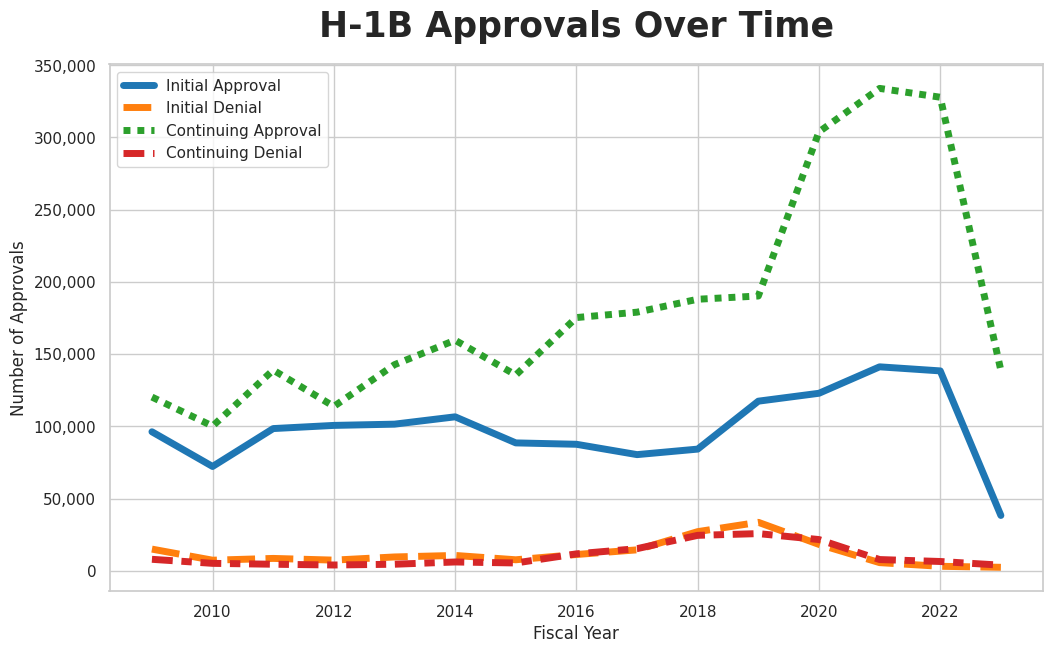

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk", font_scale=1.2, rc={'fontweight': 'medium'})
sns.set(font="Liberation Serif")

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax = sns.lineplot(data=data_to_graph, palette="tab10", linewidth=5)
ax.set_ylabel("Number of Approvals")
ax.set_title(
    "H-1B Approvals Over Time",
    fontdict={'fontsize': 25, 'fontweight': 'bold'},
    pad=20
)

# format the y-axis to include commas
formatter = plt.FuncFormatter(lambda x, _: f"{x:,.0f}")
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout(pad=5.0) #add padding to axis
plt.show()